In [1]:
import pickle

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import ttest_ind    # ttest_ind tests the equality of means
from scipy.stats import chisquare    # chisquare tests the independence of 2 distributions

In [4]:
df = pickle.load(open("/home/xhta/Robot/proj/pj_df_full.20190629_095112.pkl", "rb"))

In [5]:
len(df)

5762

In [6]:
df.head()

,case_reversed,judge_id,year,log_cites,LastName,FirstName,Gender,Pres,Party,nlets,...,antpresent,antfuture,nfpast,nfpresent,nffuture,antfpast,antfpresent,antffuture,ldeont,lmodal
caseid,,,,,,,,,,,,,,,,,,,,,
X3JGGO,0,1653,1925,1.098612,Miller,Wilbur,1,Harry S Truman,Democratic,46558.0,...,0.363874,0.172775,280.0,308.0,101.0,0.406386,0.447025,0.146589,18.0,7.0
X3OH3J,0,1034,1924,1.609438,Hickenlooper,Smith,1,Warren G. Harding,Republican,16689.0,...,0.335025,0.005076,123.0,94.0,12.0,0.537118,0.410480,0.052402,0.0,8.0
X3U0KO,0,2303,1925,1.791759,Story,William,1,Ulysses Grant,Republican,5044.0,...,0.527273,0.036364,31.0,39.0,8.0,0.397436,0.500000,0.102564,0.0,3.0
X53HAD,0,1764,1924,0.000000,Nielsen,Leland,1,Richard M. Nixon,Republican,32994.0,...,0.524927,0.052786,152.0,331.0,49.0,0.285714,0.622180,0.092105,9.0,8.0
X9VC5V,0,493,1925,0.000000,Connally,Ben,1,Harry S Truman,Democratic,1276.0,...,0.181818,0.000000,15.0,7.0,0.0,0.681818,0.318182,0.000000,0.0,1.0


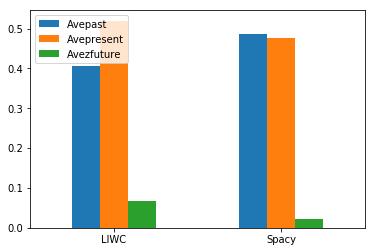

In [10]:
# make a plot showing the proportions of past, present and future tenses averaged across the entire corpus
sAvepast = df["antpast"].mean()			# spacy 
sAvepresent = df["antpresent"].mean()
sAvezfuture = df["antfuture"].mean()

lAvepast = df["antfpast"].mean()		# LIWC         
lAvepresent = df["antfpresent"].mean()
lAvezfuture = df["antffuture"].mean()

modfplot = pd.DataFrame({'Avepast' : [lAvepast, sAvepast], 'Avepresent': [lAvepresent, sAvepresent], 'Avezfuture': [lAvezfuture, sAvezfuture]}, index =
 ['LIWC', 'Spacy'] )
modfplot.plot.bar(rot=0)
plt.legend(loc='best')
plt.show()

In [11]:
# POS tagging  antpast, antpresent, antfuture

In [13]:
ttest_ind(df["antpast"], df["antpresent"])

Ttest_indResult(statistic=3.9810333139896397, pvalue=6.903741440270563e-05)

In [14]:
# LIWC  antfpast, antfpresent, antffuture   vs  POS tagging antpast, antpresent, antfuture

In [15]:
ttest_ind(df["antfpast"], df["antpast"])

Ttest_indResult(statistic=-28.8494721330526, pvalue=9.031728047365847e-177)

In [16]:
ttest_ind(df["antfpresent"], df["antpresent"])

Ttest_indResult(statistic=16.251280671509075, pvalue=9.823219810691702e-59)

In [17]:
ttest_ind(df["antffuture"], df["antfuture"])

Ttest_indResult(statistic=57.424724422704024, pvalue=0.0)

In [18]:
# POS tagging    past, present, future over the years

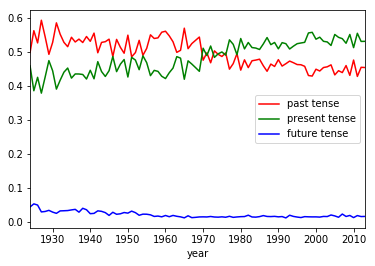

In [23]:
import matplotlib.pyplot as plt
axpast = df[df["year"] != 0 ].groupby('year')['antpast'].mean().plot(color='red', label='past tense')
axpresent = df[df["year"] != 0].groupby('year')['antpresent'].mean().plot(color='green', label='present tense')
axfuture = df[df["year"] !=0].groupby('year')['antfuture'].mean().plot(color='blue', label='future tense')
plt.legend(loc='best')
plt.show()	

In [25]:
pasttense_before1970 = df [df["year"] < 1970]["antpast"]
pasttense_after1970 = df [df["year"] >= 1970]["antpast"]

In [26]:
# indicates means before 1970 statististically significantly differs from after 1970
ttest_ind(pasttense_before1970, pasttense_after1970)

Ttest_indResult(statistic=9.648791508483363, pvalue=7.27435956407142e-22)

In [27]:
#  LIWC    past, present, future over the years

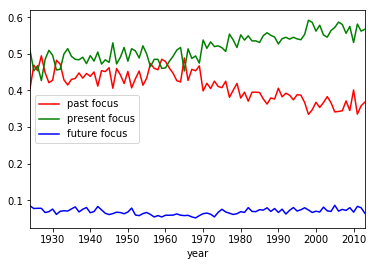

In [28]:
import matplotlib.pyplot as plt
axpast = df[df["year"] != 0 ].groupby('year')['antfpast'].mean().plot(color='red', label='past focus')
axpresent = df[df["year"] != 0].groupby('year')['antfpresent'].mean().plot(color='green', label='present focus')
axfuture = df[df["year"] !=0].groupby('year')['antffuture'].mean().plot(color='blue', label='future focus')
plt.legend(loc='best')
plt.show()	

In [29]:
pastfocus_before1970 = df [df["year"] < 1970]["antfpast"]
pastfocus_after1970 = df [df["year"] >= 1970]["antfpast"]

In [30]:
# indicates means before 1970 statististically significantly differs from after 1970
ttest_ind(pastfocus_before1970, pastfocus_after1970)

Ttest_indResult(statistic=10.291460917234133, pvalue=1.256953354749462e-24)

In [32]:
df_republican = df[ df["Party"] == "Republican"]
df_democratic = df[ df["Party"] == "Democratic"]

In [34]:
# POS tagging  past tense    rep vs dem
ttest_ind(df_republican["antpast"], df_democratic["antpast"])

Ttest_indResult(statistic=1.4863221647624705, pvalue=0.13726194142666256)

In [35]:
# POS tagging  present tense  rep vs dem
ttest_ind(df_republican["antpresent"], df_democratic["antpresent"])

Ttest_indResult(statistic=-1.5542463287572683, pvalue=0.12019394412787038)

In [37]:
# POS tagging  future tense  rep vs dem
ttest_ind(df_republican["antfuture"], df_democratic["antfuture"])

Ttest_indResult(statistic=0.8914861232937964, pvalue=0.3727147081497669)

In [38]:
# LIWC  past focus   rep vs dem
ttest_ind(df_republican["antfpast"], df_democratic["antfpast"])

Ttest_indResult(statistic=1.1871225805247378, pvalue=0.23524010971524925)

In [39]:
# LIWC  present focus  rep vs dem
ttest_ind(df_republican["antfpresent"], df_democratic["antfpresent"])

Ttest_indResult(statistic=-1.8136488402454323, pvalue=0.06979644819482464)

In [40]:
# LIWC  future focus  rep vs dem
ttest_ind(df_republican["antffuture"], df_democratic["antffuture"])

Ttest_indResult(statistic=1.5543266654359942, pvalue=0.12017478973887423)

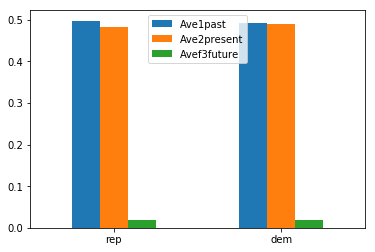

In [41]:
# POS tagging    past tense, present tense, future tense    rep vs dem
rAvepast = df_republican['antpast'].mean()
rAvepresent = df_republican['antpresent'].mean()
rAvefuture = df_republican ['antfuture'].mean()

dAvepast = df_democratic['antpast'].mean()
dAvepresent = df_democratic['antpresent'].mean()
dAvefuture = df_democratic['antfuture'].mean()

modfplot = pd.DataFrame({'Ave1past' : [rAvepast, dAvepast], 'Ave2present': [rAvepresent, dAvepresent], 'Avef3future': [rAvefuture, dAvefuture]}, index = ['rep', 'dem'] )
modfplot.plot.bar(rot=0)
plt.show()

In [43]:
# chisquared test      observed data vs expected (=uniformly distributed) data    rep     POS tagging
chisquare([100*rAvepast, 100*rAvepresent, 100*rAvefuture], [33, 33, 34])

Power_divergenceResult(statistic=45.695829225398555, pvalue=1.1947492338847863e-10)

In [44]:
# chisquared test      observed data vs expected (=uniformly distributed) data    dem     POS tagging
chisquare([100*dAvepast, 100*dAvepresent, 100*dAvefuture], [33, 33, 34])

Power_divergenceResult(statistic=45.78033523521931, pvalue=1.1453191277111074e-10)

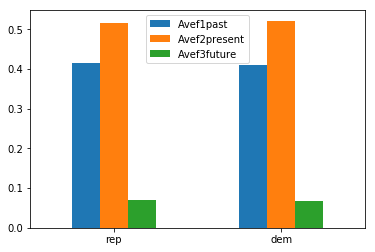

In [42]:
# LIWC   past focus, present focus, future focus    rep vs dem
rAvefpast = df_republican['antfpast'].mean()
rAvefpresent = df_republican['antfpresent'].mean()
rAveffuture = df_republican ['antffuture'].mean()

dAvefpast = df_democratic['antfpast'].mean()
dAvefpresent = df_democratic['antfpresent'].mean()
dAveffuture = df_democratic['antffuture'].mean()

modfplot = pd.DataFrame({'Avef1past' : [rAvefpast, dAvefpast], 'Avef2present': [rAvefpresent, dAvefpresent], 'Avef3future': [rAveffuture, dAveffuture]}, index = ['rep', 'dem'] )
modfplot.plot.bar(rot=0)
plt.show()

In [46]:
# chisquared test      observed data vs expected (=uniformly distributed) data    rep     LIWC
chisquare([100*rAvefpast, 100*rAvefpresent, 100*rAveffuture], [33, 33, 34])

Power_divergenceResult(statistic=34.162478536705706, pvalue=3.8169110719455536e-08)

In [47]:
# chisquared test      observed data vs expected (=uniformly distributed) data    dem     LIWC
chisquare([100*dAvefpast, 100*dAvefpresent, 100*dAveffuture], [33, 33, 34])

Power_divergenceResult(statistic=34.91204688265461, pvalue=2.6238883027468144e-08)

In [48]:
len(df["ldeont"])

5762

In [50]:
len(df[df["lmodal"].isnull()])

0

# histograms, timing orientation

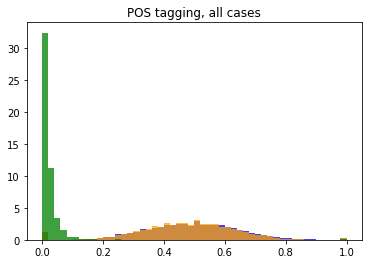

In [53]:
plt.hist(df["antpast"], 50, density=1, facecolor = 'blue', alpha = 0.75)
plt.hist(df["antpresent"], 50, density=1, facecolor = 'orange', alpha = 0.75)
plt.hist(df["antfuture"], 50, density=1, facecolor = 'green', alpha = 0.75)
plt.title("POS tagging, all cases")
plt.show()

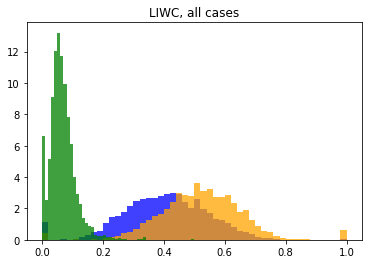

In [54]:
plt.hist(df["antfpast"], 50, density=1, facecolor = 'blue', alpha = 0.75)
plt.hist(df["antfpresent"], 50, density=1, facecolor = 'orange', alpha = 0.75)
plt.hist(df["antffuture"], 50, density=1, facecolor = 'green', alpha = 0.75)
plt.title("LIWC, all cases")
plt.show()

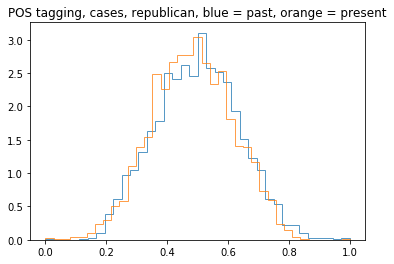

In [59]:
plt.hist(df_republican["antpast"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step')
plt.hist(df_republican["antpresent"], bins='auto', density=1, facecolor = 'orange', alpha = 0.75, histtype = 'step')
#plt.hist(df_republican["antfuture"], bins='auto', density=1, facecolor = 'green', alpha = 0.75, histtype = 'step')
plt.title("POS tagging, cases, republican, blue = past, orange = present")
plt.show()

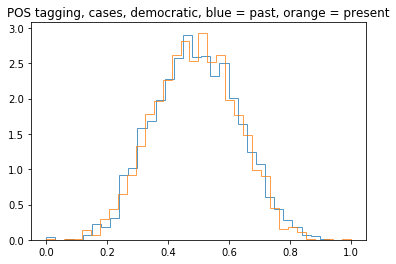

In [62]:
plt.hist(df_democratic["antpast"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step')
plt.hist(df_democratic["antpresent"], bins='auto', density=1, facecolor = 'orange', alpha = 0.75, histtype = 'step')
#plt.hist(df_democratic["antfuture"], bins='auto', density=1, facecolor = 'green', alpha = 0.75, histtype = 'step')
plt.title("POS tagging, cases, democratic, blue = past, orange = present")
plt.show()

# histogram,  deontic future and modal verbs

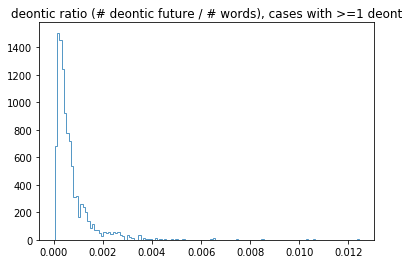

In [70]:
df['deontic_ratio'] = df['ldeont'] / df['nwords']
plt.hist(df.loc[df["deontic_ratio"] > 0, "deontic_ratio"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step')
plt.title("deontic ratio (# deontic future / # words), cases with >=1 deont")
plt.show()

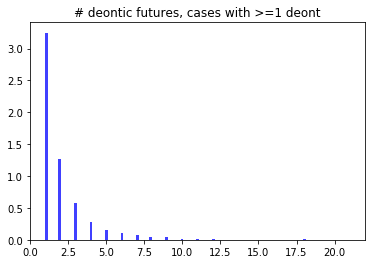

In [74]:
plt.hist(df.loc[df["ldeont"] > 0, "ldeont"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75)
plt.title("# deontic futures, cases with >=1 deont")
plt.show()

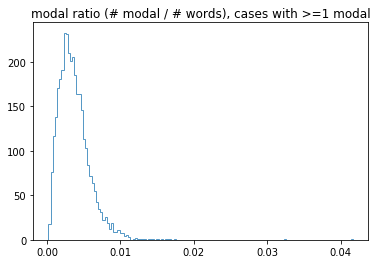

In [71]:
df['modal_ratio'] = df['lmodal'] / df['nwords']
plt.hist(df.loc[df["modal_ratio"] > 0, "modal_ratio"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step')
plt.title("modal ratio (# modal / # words), cases with >=1 modal")
plt.show()

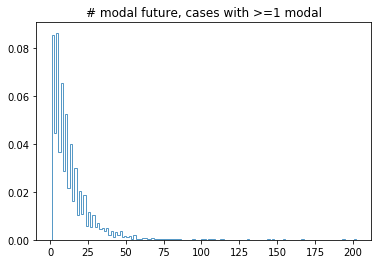

In [72]:
plt.hist(df.loc[df["lmodal"] > 0, "lmodal"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step')
plt.title("# modal future, cases with >=1 modal")
plt.show()